# Introduction to PyTorch


Python-based scientific computing package for two main purposes:

* Replacement for **NumPy** to use the power of GPUs
* **Deep learning** research platform that provides maximum flexibility and speed


Sources:


*   https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e
*   https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html



### 0) NumPy reminder


In [6]:
import numpy as np

x = np.array([2, 3])
print(x)
y = np.array([4, 9])
print(y)

print(x + y)
print(x * y)

print(np.dot(x, y))

print(x**2)

A = np.array([[2, 3], [4, 5]])
print(A)

[2 3]
[4 9]
[ 6 12]
[ 8 27]
35
[4 9]
[[2 3]
 [4 5]]


In [7]:
x = np.random.normal(size=10)
print(x)

A = np.random.normal(size=(4, 4))
print(A)

print(A**2)

print(np.linalg.inv(A))

[ 0.09841535 -0.67050515  2.15371821 -1.1330905  -0.50964782 -0.69360511
  0.62424255 -0.89192813 -0.25184271  0.924751  ]
[[ 0.39251591 -1.14959952 -0.10570662 -1.25918612]
 [-0.6703806   0.14711481 -0.98394683 -0.9374134 ]
 [ 0.03392595  1.38445041 -0.18246773  0.33437777]
 [ 0.21942186  0.51271531 -2.35189761  0.8354545 ]]
[[1.54068739e-01 1.32157905e+00 1.11738886e-02 1.58554968e+00]
 [4.49410152e-01 2.16427678e-02 9.68151365e-01 8.78743891e-01]
 [1.15097038e-03 1.91670293e+00 3.32944742e-02 1.11808493e-01]
 [4.81459521e-02 2.62876991e-01 5.53142237e+00 6.97984224e-01]]
[[ 0.96888084 -0.80775916  0.80444882  0.23197821]
 [ 0.10394189  0.07076532  0.83786614 -0.09928161]
 [-0.09271448 -0.16733786  0.07288272 -0.35666802]
 [-0.57925501 -0.30235513 -0.52030095  0.19289555]]


### 1) Basic operations

In [8]:
import torch

x = torch.tensor([3., 4.])
y = torch.tensor([5., 9.])

print(x + y)
print(x - y)
print(x ** 2)

A = torch.tensor([[2., 3.], [4., 5.]])
print(A)

print(torch.matmul(A, x))

tensor([ 8., 13.])
tensor([-2., -5.])
tensor([ 9., 16.])
tensor([[2., 3.],
        [4., 5.]])
tensor([18., 32.])


In [9]:
torch.cuda.is_available()

False

In [10]:
print(x)

# x = x.to('cuda')
# y = y.to('cuda')

print(x + y)

tensor([3., 4.])
tensor([ 8., 13.])


### 2) Bridge to NumPy

In [11]:
a = np.array([2, 3])
x = torch.from_numpy(a)
print(x)
print(x.numpy())

tensor([2, 3])
[2 3]


### 3) Automatic Differentiation

Mathematically, if you have a vector valued function $y=f(x)$, then the gradient of $y$  with respect to $x$  is a Jacobian matrix:

\begin{split}J=\left(\begin{array}{ccc}
 \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
 \vdots & \ddots & \vdots\\
 \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
 \end{array}\right)\end{split}

Generally speaking, `torch.autograd` is an engine for computing vector-Jacobian product. That is, given any vector $v=\left(\begin{array}{cccc} v_{1} & v_{2} & \cdots & v_{m}\end{array}\right)^{T}$  compute the product   $v^{T}\cdot J$.


If $v$ happens to be happens to be the gradient of a scalar function $l = g(y)$, that is $v=\left(\begin{array}{ccc}\frac{\partial l}{\partial y_{1}} & \cdots & \frac{\partial l}{\partial y_{m}}\end{array}\right)^{T}$, then by the chain rule, the vector-Jacobian product would be the gradient of $l$ with respect to $x$:

\begin{split}J^{T}\cdot v=\left(\begin{array}{ccc}
 \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{1}}\\
 \vdots & \ddots & \vdots\\
 \frac{\partial y_{1}}{\partial x_{n}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
 \end{array}\right)\left(\begin{array}{c}
 \frac{\partial l}{\partial y_{1}}\\
 \vdots\\
 \frac{\partial l}{\partial y_{m}}
 \end{array}\right)=\left(\begin{array}{c}
 \frac{\partial l}{\partial x_{1}}\\
 \vdots\\
 \frac{\partial l}{\partial x_{n}}
 \end{array}\right)\end{split}


In [12]:
a = torch.tensor([2.0, 3.0], requires_grad=True)
b = torch.tensor([3.0, 4.0], requires_grad=True)

y = 3*a**3 - b**2
print(y)

tensor([15., 65.], grad_fn=<SubBackward0>)


In [13]:
y.backward(torch.tensor([1.,1.]))

In [14]:
print(a.grad == 9*a**2)
print(b.grad == -2*b)

tensor([True, True])
tensor([True, True])


### 4) Linear regression example

In [15]:
x = torch.normal(0, 5, size=(100,))
y = x * 10 + 4 + 5 * torch.normal(0, 1, size=(100,))

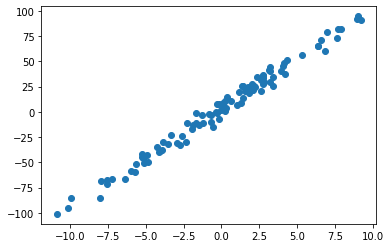

In [16]:
import matplotlib.pyplot as plt

plt.scatter(x, y)

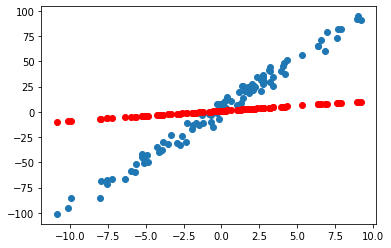

In [17]:
a = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

def plot_model(q, w):
  plt.scatter(x, y)
  plt.scatter(x, q.detach() * x + w.detach(), color='red')

plot_model(a, b)

In [18]:
import torch.optim as optim

lr = 0.001

sgd = optim.SGD([a, b], lr)

for i in range(100):
  error = torch.mean((x * a + b - y) ** 2)

  print(error.detach())

  error.backward()

  # with torch.no_grad():
  #   a -= lr * a.grad
  #   b -= lr * b.grad

  sgd.step()

  # a.grad.zero_()
  # b.grad.zero_()
  sgd.zero_grad()

tensor(1604.5720)
tensor(1480.4678)
tensor(1366.1764)
tensor(1260.9218)
tensor(1163.9888)
tensor(1074.7197)
tensor(992.5084)
tensor(916.7966)
tensor(847.0705)
tensor(782.8564)
tensor(723.7186)
tensor(669.2556)
tensor(619.0976)
tensor(572.9043)
tensor(530.3621)
tensor(491.1821)
tensor(455.0986)
tensor(421.8666)
tensor(391.2606)
tensor(363.0730)
tensor(337.1124)
tensor(313.2029)
tensor(291.1822)
tensor(270.9008)
tensor(252.2213)
tensor(235.0170)
tensor(219.1712)
tensor(204.5765)
tensor(191.1340)
tensor(178.7524)
tensor(167.3480)
tensor(156.8435)
tensor(147.1676)
tensor(138.2550)
tensor(130.0451)
tensor(122.4825)
tensor(115.5160)
tensor(109.0984)
tensor(103.1863)
tensor(97.7398)
tensor(92.7220)
tensor(88.0991)
tensor(83.8397)
tensor(79.9153)
tensor(76.2992)
tensor(72.9672)
tensor(69.8968)
tensor(67.0672)
tensor(64.4594)
tensor(62.0560)
tensor(59.8407)
tensor(57.7986)
tensor(55.9162)
tensor(54.1807)
tensor(52.5806)
tensor(51.1052)
tensor(49.7445)
tensor(48.4896)
tensor(47.3321)
tensor(46.2

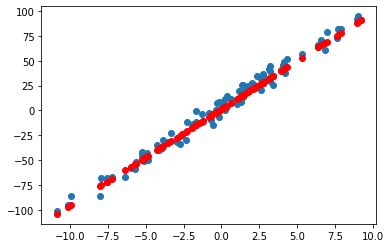

In [19]:
plot_model(a, b)

### 5) Non-linear regression example


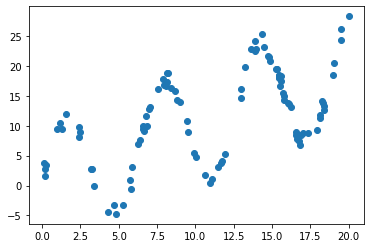

In [21]:
n = 100
x = torch.rand(n, 1) * 20
y = 10 * torch.sin(x) + x
y += torch.randn(y.shape)

plt.scatter(x, y)

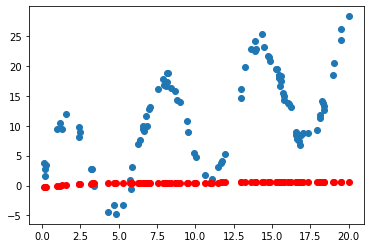

In [22]:
import torch.nn as nn


def plot_model(model):
    plt.scatter(x, y)
    plt.scatter(x, model(x).detach(), color='red')


model = nn.Sequential(nn.Linear(1, 100), 
                      nn.Tanh(),
                      nn.Linear(100, 1))

plot_model(model)

In [23]:
from torch.optim import Adam

lr = 0.01
optimizer = Adam(model.parameters(), lr=lr)

for i in range(5000):
    f = model(x)

    loss = torch.sum((f - y) ** 2)

    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if i % 1000 == 0:
        print(loss.item())

18561.515625
2764.34619140625
87.85774993896484
60.583953857421875
61.534481048583984


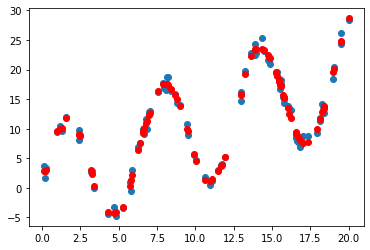

In [24]:
plot_model(model)